In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
whisky= pd.read_csv("whiskies.txt")
region= pd.read_csv("regions.txt")
regions_column=["Regions"]
region.columns=regions_column
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [3]:
whisky["Regions"]= region.Regions

In [4]:
# Create dataframe about corrolation of flavors dataframe
# from whisky dataset all rows and from second column to the fourteenth column
flavors= whisky.iloc[:,2:14]
# comput the coorolation and save data into new dataset
corr_flavors= pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

##### Data visualisation

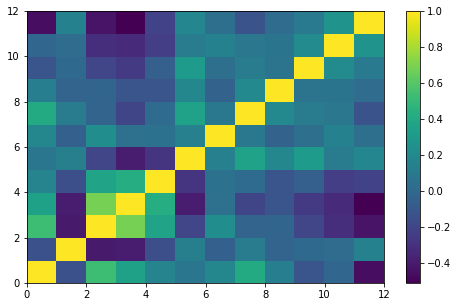

In [5]:
# visualize the corrolation of corr_flavors
plt.figure(figsize=(8,5))
plt.pcolor(corr_flavors)
plt.colorbar()

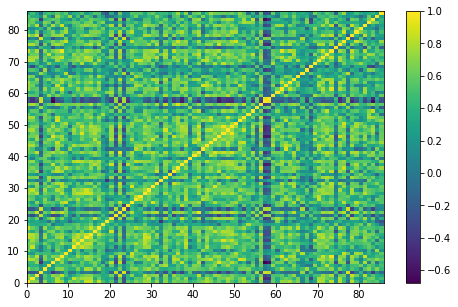

In [6]:
# transpose flavors dataset and comput the coorolation of them and save the data into new dataset that called corr_whisky
# and visaulize it.
corr_whisky= pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(8,5))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()

In [7]:
from sklearn.cluster.bicluster import SpectralCoclustering
# n_clusters : is the number of clusters we'd like to specify.

model= SpectralCoclustering(n_clusters= 6, random_state= 0)
model.fit(corr_whisky)


SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=0,
                     svd_method='randomized')

In [8]:
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [9]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

In [10]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

In [11]:
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index) 
whisky = whisky.ix[np.argsort(model.row_labels_)] 
whisky = whisky.reset_index(drop=True) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [12]:
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose()) 
correlations = np.array(correlations) 


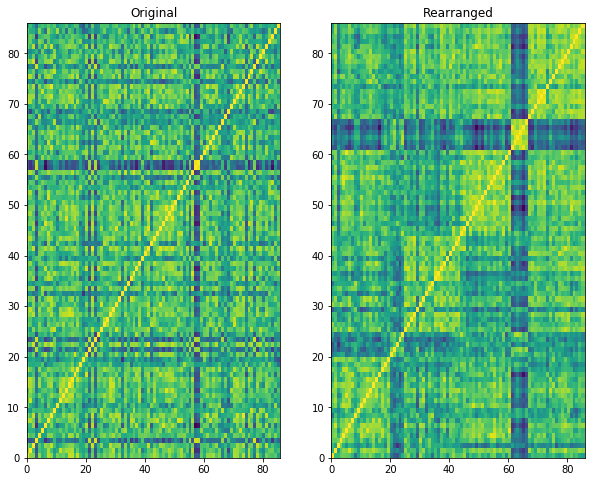

In [13]:
plt.figure(figsize = (10, 8)) 
plt.subplot(121) 
plt.pcolor(corr_whisky) 
plt.title("Original") 
plt.axis("tight") 
plt.subplot(122) 
plt.pcolor(correlations) 
plt.title("Rearranged") 
plt.axis("tight") 
plt.show() 
# plt.savefig("correlations.pdf") 

In [14]:
whisky.Group.value_counts()

0    20
5    19
2    19
3    17
4     6
1     5
Name: Group, dtype: int64

In [16]:
d= pd.Series([1,2,3,4])
d= d.ix([3,0,1,2])
d= d.reset_index(drop= true)
d

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:109: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  new_self = self.__class__(self.name, self.obj)


TypeError: unhashable type: 'list'